In [1]:
########################
# Libraries
########################
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time

In [2]:
cart_data = pd.read_csv("orders.csv")
df = cart_data.copy()
df.head()

,cartid,storeid,skuid,skuname
0,c6d33d18-1b6a-4f3d-bb60-6816bead5dae,6a66e915-d452-42b4-8c70-fb5b2075d6e7,a636ec33-6ad0-4b40-8ebf-3e3b7cc6c644,Veg Zinger Meal
1,329ed498-38d4-4270-b322-3132f9381d16,6a66e915-d452-42b4-8c70-fb5b2075d6e7,b8d534a1-6da0-49a1-a442-f4d6e5670b48,Hot & Crispy 2Pc Meal (With F&P)
2,ba18f91f-97cc-4946-b258-7dc9032d2b4b,6a66e915-d452-42b4-8c70-fb5b2075d6e7,b5115cee-1bbe-49a3-bb75-6678ace99389,Tandoori Zinger Burger Meal
3,87cbaa52-4000-435d-8ea7-fdde947b5422,6a66e915-d452-42b4-8c70-fb5b2075d6e7,62b468b0-49b2-4a6c-a018-fdbfb14e3aec,Hot Wings
4,87cbaa52-4000-435d-8ea7-fdde947b5422,6a66e915-d452-42b4-8c70-fb5b2075d6e7,2600f179-02cc-4cf0-962c-630dfa810a26,Popcorn


In [3]:
########################
# Analyze the Dataset
########################

def df_summary(df):
    print("############### OBSERVATIONS-COLUMNS COUNTS ###############")
    print("\n")
    print(df.shape)
    print("############### INDEX ###############")
    print("\n")
    print(df.index)
    print("############### COLUMNS ###############")
    print("\n")
    print(df.columns)
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(df.info())
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(df.describe().T)

df_summary(df)

############### OBSERVATIONS-COLUMNS COUNTS ###############


(500, 4)
############### INDEX ###############


RangeIndex(start=0, stop=500, step=1)
############### COLUMNS ###############


Index(['cartid', 'storeid', 'skuid', 'skuname'], dtype='object')
############### DATAFRAME INFORMATIONS ###############


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cartid   500 non-null    object
 1   storeid  500 non-null    object
 2   skuid    500 non-null    object
 3   skuname  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB
None
############### DATAFRAME INFORMATIONS ###############


        count unique                                   top freq
cartid    500    369  321dd322-d1e8-40e2-9119-e6d75be9def6    4
storeid   500      1  6a66e915-d452-42b4-8c70-fb5b2075d6e7  500
skuid     500     39  330dec4e-3e6f-4b46-ae9f-625b8d778bec   96
sk

In [4]:
def missing_value_analysis(df):
    print("Is there any missing value on the dataset?")
    print(df.isnull().values.any())
    missing = df.isnull().values.any()

    if (missing == True):
        print("############### MISSING VALUE COUNTS BY VARIABLES ###############")
        print(df.isnull().sum())
        print("############### TOTAL MISSING VALUE COUNTS ###############")
        print(df.isnull().sum().sum())
    else:
        pass

missing_value_analysis(df)

Is there any missing value on the dataset?
False


# EDA

In [5]:
import matplotlib.pyplot as plt
pop_items = df['skuname'].value_counts()[:10].sort_values(ascending=False)
pop_items

Veg Zinger                    96
Classic Zinger                56
Popcorn                       50
Fries                         36
Classic Zinger Meal Box       33
Veg Zinger Meal               33
Tandoori Zinger Burger        28
Classic Zinger Meal           20
Pepsi                         16
Tandoori Zinger Burger Box    16
Name: skuname, dtype: int64

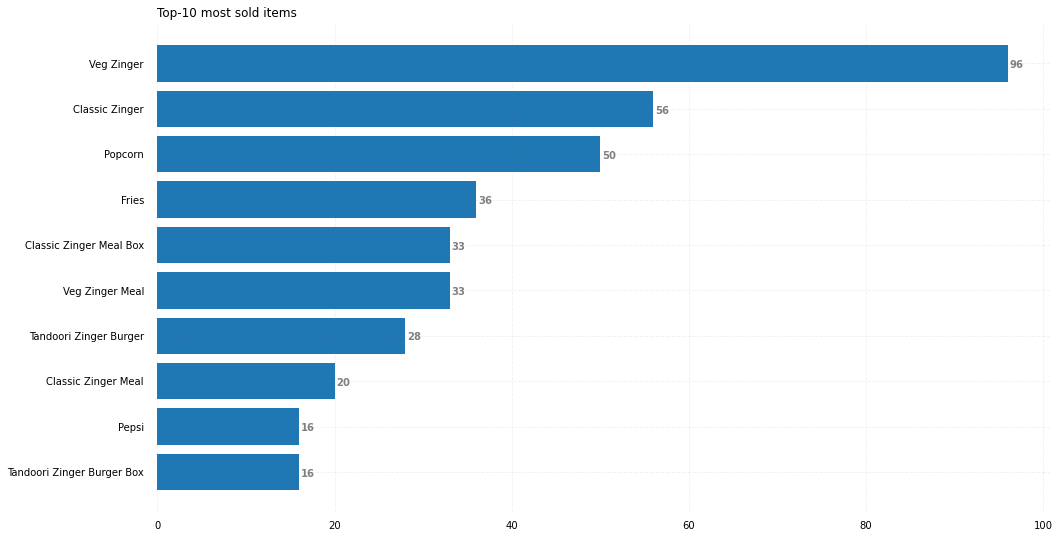

In [6]:
fig, ax = plt.subplots(figsize =(16, 9))

plt.barh(pop_items.index, pop_items)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top-10 most sold items',
             loc ='left', )
 
# Show Plot
plt.show()

# FP GROWTH

In [7]:
# ! pip install fpgrowth_py
from fpgrowth_py import fpgrowth

In [8]:
basket = df.groupby(['cartid']).agg({'skuname': lambda s: list(set(s))}) 
basket

,skuname
cartid,
000f3bf4-51c2-4f3d-b777-6bfb9c8ce3e5,[Fries]
00c7f89b-5059-485d-858c-8cc217d467af,[Veg Zinger]
01023389-9f2a-4121-8b3b-28d327574c0c,[Classic Zinger Meal Box]
0286b60f-06e5-43f4-bf25-8134db5ad4c4,[Hot & Crispy]
02c04c0c-4ef6-45b4-bf27-1bc3c8b73808,"[Hot Wings, Fries, Popcorn]"
...,...
fcd17f26-cc9f-4d8b-a149-f5acb07f2d1b,"[Classic Zinger Meal, Veg Zinger]"
fd1b9f19-8703-4009-82c2-f40c324bb176,"[Pepsi, Tandoori Zinger Burger, Fries, 2Pc Chi..."
fd5047a0-fd6f-4f5e-9a6c-e49b52e31580,[Chicken Strips]


In [9]:
a=time.time()
freqItemSet, rules = fpgrowth(basket['skuname'].values, minSupRatio=0.005, minConf=0.3)
b=time.time()
print('time to execute in seconds : ',b-a, ' s.')
print('Number of rules generated : ', len(rules))

association=pd.DataFrame(rules,columns =['basket','next_product','proba']) 
association=association.sort_values(by='proba',ascending=False)
print('Dimensions of the association table are : ', association.shape)
association.head(15)

time to execute in seconds :  0.023933887481689453  s.
Number of rules generated :  25
Dimensions of the association table are :  (25, 3)


,basket,next_product,proba
0,{Veg Strips Rice & Pepsi},{Extra Condiments Cheese},1.000000
1,{Veg Strips Rice & Pepsi},{Veg Zinger},1.000000
2,{Veg Strips Rice & Pepsi},"{Extra Condiments Cheese, Veg Zinger}",1.000000
22,"{Fries, Popcorn, Veg Zinger}",{Classic Zinger},1.000000
4,"{Extra Condiments Cheese, Veg Strips Rice & Pe...",{Veg Zinger},1.000000
5,"{Veg Zinger, Veg Strips Rice & Pepsi}",{Extra Condiments Cheese},1.000000
6,{Popcorn Chicken Rice & Pepsi},{Hot & Crispy},1.000000
21,"{Classic Zinger, Popcorn, Veg Zinger}",{Fries},1.000000
20,"{Fries, Classic Zinger, Veg Zinger}",{Popcorn},1.000000
19,"{Fries, Classic Zinger, Popcorn}",{Veg Zinger},1.000000


In [10]:
def compute_next_best_product(basket_el):
    """
    parameter : basket_el = list of consumer basket elements
    return : next_pdt, proba = next product to recommend, buying probability. Or (0,0) if no product is found. 
            
    
    Description : from the basket of a user, returns the product to recommend if it was not found 
    in the list of associations of the table associated with the FP Growth model. 
    To do this, we search in the table of associations for the product to recommend from each 
    individual product in the consumer's basket. 
    
    """
    
    for k in basket_el: # for each element in the consumer basket
            k={k}
            if len(association[association['basket']==k].values) !=0: # if we find a corresponding association in the fp growth table
                next_pdt=list(association[association['basket']==k]['next_product'].values[0])[0] # we take the consequent product
                if next_pdt not in basket_el : # We verify that the customer has not previously purchased the product
                    proba=association[association['basket']==k]['proba'].values[0] # Find the associated probability. 
                    return(next_pdt,proba)
    
    return(0,0) # return (0,0) if no product was found. 

In [11]:
x,y = compute_next_best_product({'Himalayan'})
print(x,y)

Veg Zinger 0.5


In [12]:
def find_next_product(basket):
    """
    Parameter : basket = consumer basket dataframe
    Return : list_next_pdt, list_proba = list of next elements to recommend and the buying probabilities associated.
    
    description : Main function that uses the one above. For each client in the dataset we look for a corresponding 
    association in the Fp Growth model table. If no association is found, we call the compute_next_best_product 
    function which searches for individual product associations.
    If no individual ssociations are found, the function returns (0,0).
    
    """
    n=basket.shape[0]
    list_next_pdt=[]
    list_proba=[]
    for i in range(n): # for each customer
        el=set(basket['skuname'][i]) # customer's basket
        if len(association[association['basket']==el].values) !=0: # if we find a association in the fp growth table corresponding to all the customer's basket.
            next_pdt=list(association[association['basket']==el]['next_product'].values[0])[0] # We take the consequent product
            proba=association[association['basket']==el]['proba'].values[0] # Probability associated in the table
            list_next_pdt.append(next_pdt)
            list_proba.append(proba)


        elif len(association[association['basket']==el].values) ==0: # If no antecedent to all the basket was found in the table
            next_pdt,proba= compute_next_best_product(basket['skuname'][i]) # previous function
            list_next_pdt.append(next_pdt)
            list_proba.append(proba)
            
    return(list_next_pdt, list_proba)

In [13]:
a=time.time()
list_next_pdt, list_proba= find_next_product(basket) 
b=time.time()
print(b-a)
basket['Recommended Product']=list_next_pdt # Set of recommended products
basket['Probability']=list_proba # Set of rprobabilities associated


0.7252960205078125


In [14]:
basket=basket.rename(columns = {'skuname': 'Customer basket'})
data_stock=df.drop_duplicates(subset ="skuname", inplace = False)
prices=[]
description_list=[]
for i in range(basket.shape[0]):
    stockcode=basket['Recommended Product'][i]
    probability= basket['Probability'][i]

basket = basket.reindex(columns=['Customer basket','Recommended Product'])
basket.head()

,Customer basket,Recommended Product
cartid,,
000f3bf4-51c2-4f3d-b777-6bfb9c8ce3e5,[Fries],0
00c7f89b-5059-485d-858c-8cc217d467af,[Veg Zinger],0
01023389-9f2a-4121-8b3b-28d327574c0c,[Classic Zinger Meal Box],0
0286b60f-06e5-43f4-bf25-8134db5ad4c4,[Hot & Crispy],0
02c04c0c-4ef6-45b4-bf27-1bc3c8b73808,"[Hot Wings, Fries, Popcorn]",0


In [15]:
x = basket.loc[basket['Recommended Product'] != 0]
x.head()

,Customer basket,Recommended Product
cartid,,
0da7d882-1d64-4568-8a08-8e7abbe63b25,"[Tandoori Zinger Burger, Himalayan, Grand Meal...",Veg Zinger
130e8f49-18c6-4826-9c64-4dbe79b373d9,"[Fries, Chicken Strips]",Popcorn
1d2c75da-bf65-4395-972f-a56cf11415ea,"[Pepsi, Hot & Crispy, Tandoori Zinger Burger Box]",Veg Zinger
1ff80a74-42d9-4b75-b74d-9b6418e1c8bc,"[Classic Zinger Meal Box, Chicken Strips]",Popcorn
2822e762-dd7f-4f01-be4c-9dbd83a4190d,"[Pepsi, Classic Zinger, Chicken Strips]",Veg Zinger


# APPROCH 1 (Cosine similarity)

In [16]:
########################
# Preprocessing
########################
clean = df.copy()
def preprocessor(df):
    clean.dropna(inplace = True)
    del clean['storeid']

preprocessor(clean)
df.head()
type(clean.head())

pandas.core.frame.DataFrame

In [25]:
########################
# Creating TF-IDF Matrix
########################

# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(df["skuname"])
# tfidf_matrix.shape
# pd.DataFrame(tfidf_matrix.toarray()).head()

# Making Full Matrix(Sparse Matrix)
num_of_order = clean.pivot_table(index='cartid',values=['skuname'], aggfunc=len)
# clean_pivot = pd.pivot_table(clean, index='cartid', columns='skuname',values=['skuid'], aggfunc=len).fillna(0)
clean_pivot = pd.pivot_table(clean, columns='cartid', index='skuname',values=['skuid'], aggfunc=len).fillna(0)
clean_pivot.columns = clean_pivot.columns.droplevel()
print(clean_pivot.shape,type(clean_pivot),clean_pivot.columns[:5]  )


(29, 369) <class 'pandas.core.frame.DataFrame'> Index(['000f3bf4-51c2-4f3d-b777-6bfb9c8ce3e5',
       '00c7f89b-5059-485d-858c-8cc217d467af',
       '01023389-9f2a-4121-8b3b-28d327574c0c',
       '0286b60f-06e5-43f4-bf25-8134db5ad4c4',
       '02c04c0c-4ef6-45b4-bf27-1bc3c8b73808'],
      dtype='object', name='cartid')


In [27]:
clean_pivot

cartid,000f3bf4-51c2-4f3d-b777-6bfb9c8ce3e5,00c7f89b-5059-485d-858c-8cc217d467af,01023389-9f2a-4121-8b3b-28d327574c0c,0286b60f-06e5-43f4-bf25-8134db5ad4c4,02c04c0c-4ef6-45b4-bf27-1bc3c8b73808,02d71dce-0cc9-4e18-8889-e05e5acd0377,039d21a5-b3d9-4511-be11-256c51e8147b,040760d4-1150-441a-9890-3ae7a405b96f,04c74e10-6555-4245-8c95-a0583f442f0b,05c7a6b4-4092-478f-89e0-bd4e2147d8a5,...,fade81b3-eb20-4526-8c45-4bd06b20e44e,fae18495-cc71-469b-8f9d-4b96b35166a4,fb06992d-b4eb-466a-b2f5-41877a44fcf4,fb5d1897-8db7-40d4-aa6d-aa57f4c85383,fc41f11d-9f13-4e00-88fd-a44899348f1c,fcd17f26-cc9f-4d8b-a149-f5acb07f2d1b,fd1b9f19-8703-4009-82c2-f40c324bb176,fd5047a0-fd6f-4f5e-9a6c-e49b52e31580,fedcb236-34a2-4d8c-b50f-ed67defa84ae,ff5d0531-9ffc-409b-a0ce-8b037e0b75a2
skuname,,,,,,,,,,,,,,,,,,,,,
2Pc Chicken Of Choice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7 Up,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All Chicken Box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chicken Strips,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Classic Zinger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Classic Zinger Meal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
Classic Zinger Meal Box,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extra Condiments Cheese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fries,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
########################
# Creating Cosine Similarity Matrix
########################
cos_sim = cosine_similarity(clean_pivot)
print(pd.DataFrame(cos_sim))

          0         1         2         3         4         5         6   \
0   1.000000  0.258199  0.000000  0.086066  0.034503  0.057735  0.044947   
1   0.258199  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
3   0.086066  0.000000  0.000000  1.000000  0.044544  0.000000  0.116052   
4   0.034503  0.000000  0.000000  0.044544  1.000000  0.059761  0.023262   
5   0.057735  0.000000  0.000000  0.000000  0.059761  1.000000  0.000000   
6   0.044947  0.000000  0.000000  0.116052  0.023262  0.000000  1.000000   
7   0.000000  0.000000  0.000000  0.000000  0.040291  0.000000  0.052486   
8   0.129099  0.000000  0.000000  0.111111  0.066815  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.054554  0.000000  0.000000   
12  0.000000

In [29]:
def skuname_searcher(df, name_words_contain):
    print(df.loc[df["skuname"].str.contains(name_words_contain, na = False), "skuname"], 'ITS HERE')

skuname_searcher(clean, name_words_contain = "Meal")

0                       Veg Zinger Meal
1      Hot & Crispy 2Pc Meal (With F&P)
2           Tandoori Zinger Burger Meal
6               Classic Zinger Meal Box
10                  Classic Zinger Meal
                     ...               
470         Tandoori Zinger Burger Meal
475                 Classic Zinger Meal
491                     Veg Zinger Meal
496                 Classic Zinger Meal
499             Classic Zinger Meal Box
Name: skuname, Length: 109, dtype: object ITS HERE


In [57]:
########################
# Creating Content Based Recommender
########################
# clean_pivot
indices = pd.Series(data = clean_pivot.index)


indices = indices[~indices.index.duplicated()]

print(indices)

movie_name = 'Popcorn'
movie_index = indices[indices == movie_name].index[0]
print(movie_index)

# similarity_score = pd.DataFrame(cos_sim[movie_index], columns = ["score"])


# def content_based_recommender(df, movie_name = "Cowboy Bebop" , rec_count = 1):

#     
# similar_animes = similarity_score.sort_values(by = "score", ascending = True). \
#             iloc[1:5].index
# print(df["skuname"].iloc[similar_animes])

0                                 2Pc Chicken Of Choice
1                                                  7 Up
2                                       All Chicken Box
3                                        Chicken Strips
4                                        Classic Zinger
5                                   Classic Zinger Meal
6                               Classic Zinger Meal Box
7                               Extra Condiments Cheese
8                                                 Fries
9                       Grand Meal (4Pc Hc + 4Pc Wings)
10                              Grand Meal With 2 Pepsi
11                                            Himalayan
12                                         Hot & Crispy
13                     Hot & Crispy 2Pc Meal (With F&P)
14                         Hot & Crispy Rice With Pepsi
15                                            Hot Wings
16                                                Pepsi
17                                              

In [85]:
def content_based_recommender(df, movie_name = "Popcorn", rec_count = 1):
    indices = pd.Series(data = clean_pivot.index)
    indices = indices[~indices.index.duplicated(keep = "last")]
    movie_index = indices[indices == movie_name].index[0]
    similarity_score = pd.DataFrame(cos_sim[movie_index], columns = ["score"])
    similar_animes = similarity_score.sort_values(by = "score", ascending = True). \
            iloc[1:rec_count].index
    return df["skuname"].loc[similar_animes].drop_duplicates()

In [86]:
content_based_recommender(clean, movie_name = "Veg Zinger Meal", rec_count = 5)

26         Veg Zinger
25            Popcorn
23    Veg Zinger Meal
22     Classic Zinger
Name: skuname, dtype: object